<a href="https://colab.research.google.com/github/BachokunIAR/pytorch-deep-learning/blob/main/PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

++++++++++++++++++++++++++++++++++++++++++++++++++++++
# <font color=red>0. Importing PyTorch and setting up device-agnostic code

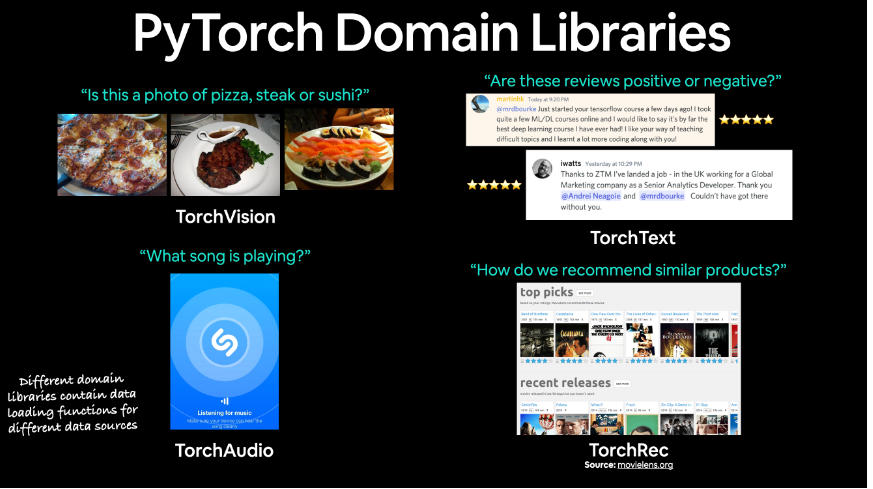

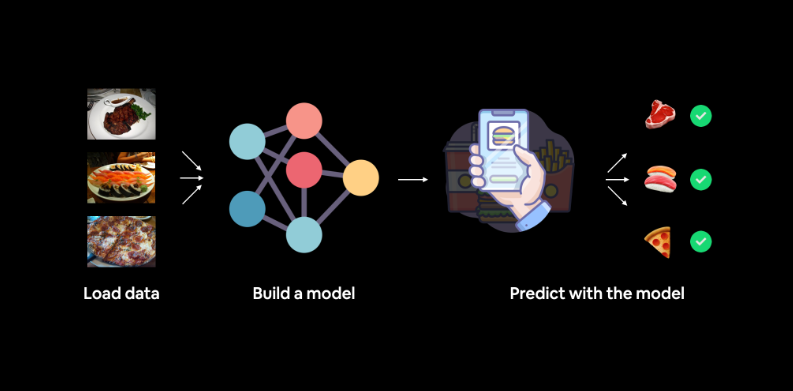

In [ ]:
import torch
from torch import nn
torch.__version__

'2.1.0+cu118'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'


# <font color = red> 1. Get data

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  #request = requests.get("https://github.com/BachokunIAR/pytorch-deep-learning/raw/main/Customer_data_creation.ipynb")
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

    # Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...


# <font color = red> 2.  Familiarizing one self with the data

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are : {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'. ")



In [ ]:
walk_through_dir(image_path)

There are : 2 directories and 0 images in 'data/pizza_steak_sushi'. 
There are : 3 directories and 0 images in 'data/pizza_steak_sushi/test'. 
There are : 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'. 
There are : 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'. 
There are : 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'. 
There are : 3 directories and 0 images in 'data/pizza_steak_sushi/train'. 
There are : 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'. 
There are : 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'. 
There are : 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'. 


In [ ]:
train_dir = image_path/'train'
test_dir = image_path/'test'
test_dir, test_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/test/sushi/1742201.jpg
Image class: sushi
Image height: 512
Image width: 512


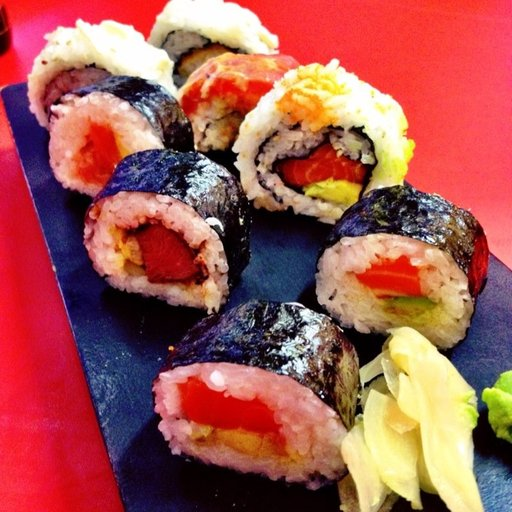

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

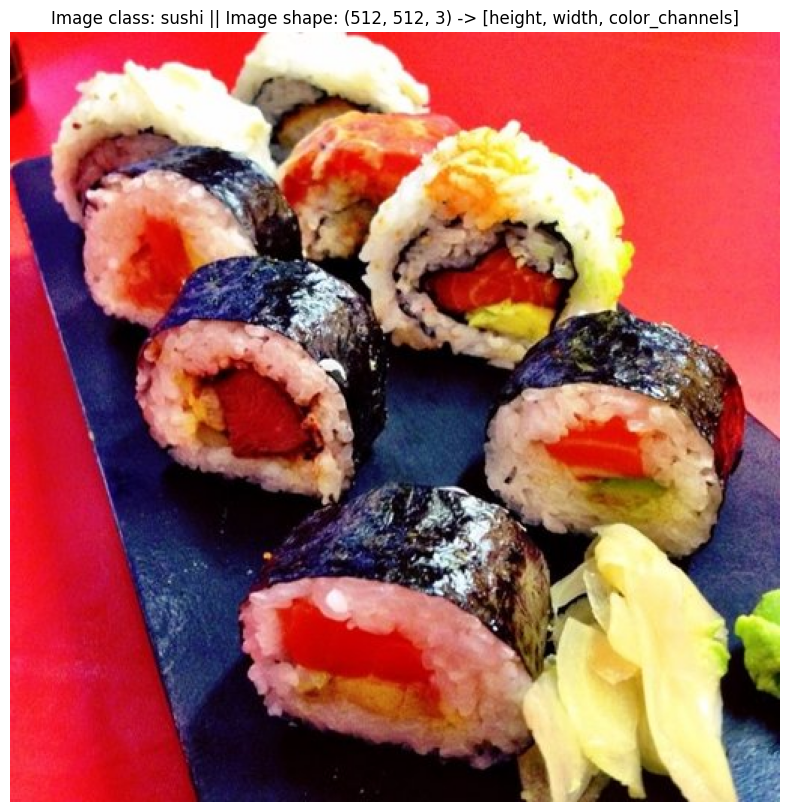

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(img)

# plot the image
plt.figure(figsize=(10,10))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} || Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis('off');

# <font color =red> 3. Transforming data

In other to be able to use the data in pytorch, it must be turned into a Tensors(in other words represent the images in numerical form)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([transforms.Resize(size =(2024,2024)),
                                     # Resize the images to 2024x2024x2024 (2024 height, 2024 width, 2024 color channels)
                                     transforms.RandomHorizontalFlip(p=0.5), # Flip the images randomly on horizontal
                                     transforms.ToTensor() # converts all pixel values from 0-255 to be between 0-1
                                     ])

In [ ]:
random.sample(image_path_list, k=3)

[PosixPath('data/pizza_steak_sushi/test/steak/100274.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2629750.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg')]

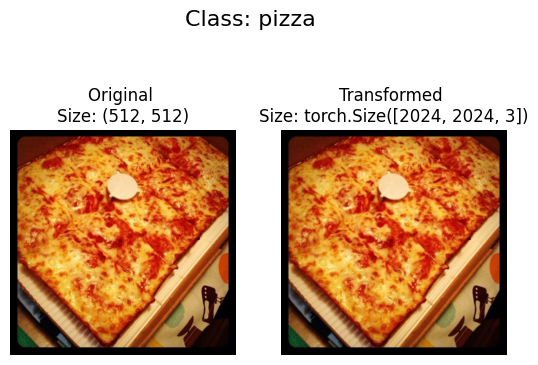

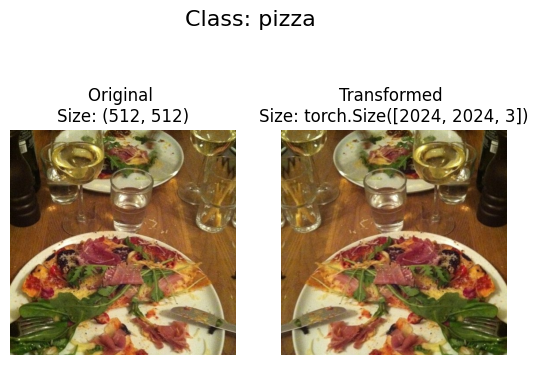

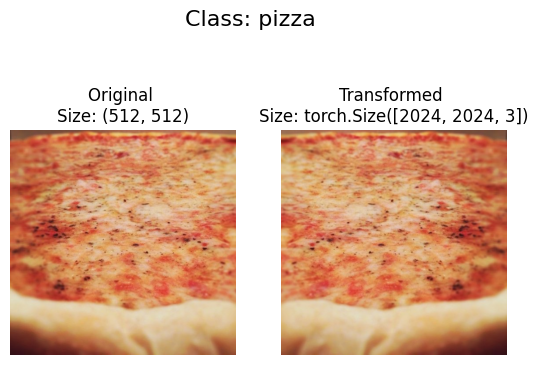

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

# **<font color =red> 4. Option 1: Loading Image Data Using ImageFolder**
https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(2024, 2024), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(2024, 2024), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
# image is now in tensor mode

Image tensor:
tensor([[[0.1098, 0.1098, 0.1098,  ..., 0.1020, 0.1020, 0.1020],
         [0.1098, 0.1098, 0.1098,  ..., 0.1020, 0.1020, 0.1020],
         [0.1098, 0.1098, 0.1098,  ..., 0.1020, 0.1020, 0.1020],
         ...,
         [0.0863, 0.0863, 0.0863,  ..., 0.1608, 0.1647, 0.1647],
         [0.0863, 0.0863, 0.0863,  ..., 0.1608, 0.1647, 0.1647],
         [0.0863, 0.0863, 0.0863,  ..., 0.1608, 0.1647, 0.1647]],

        [[0.0667, 0.0667, 0.0667,  ..., 0.0471, 0.0471, 0.0471],
         [0.0667, 0.0667, 0.0667,  ..., 0.0471, 0.0471, 0.0471],
         [0.0667, 0.0667, 0.0667,  ..., 0.0471, 0.0471, 0.0471],
         ...,
         [0.1020, 0.1020, 0.1020,  ..., 0.2314, 0.2353, 0.2353],
         [0.1020, 0.1020, 0.1020,  ..., 0.2314, 0.2353, 0.2353],
         [0.1020, 0.1020, 0.1020,  ..., 0.2314, 0.2353, 0.2353]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.0118, 0.0118, 0.0118],
         [0.0902, 0.0902, 0.0902,  ..., 0.0118, 0.0118, 0.0118],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

Original shape: torch.Size([3, 2024, 2024]) -> [color_channels, height, width]
Image permute shape: torch.Size([2024, 2024, 3]) -> [height, width, color_channels]


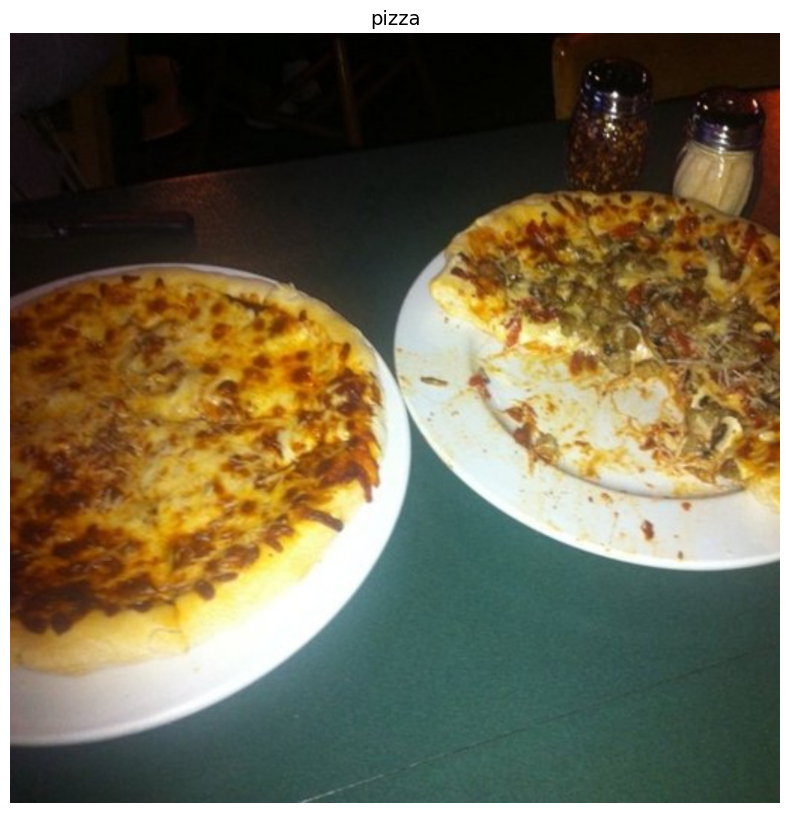

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

# **<font color = red> 4.1 Turn loaded images into DataLoader's**

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

BATCH_SIZE = 2
NUM_WORKERS = 5
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=BATCH_SIZE, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True # shuffle the data
                              )

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False # test data are usually not shuffled
                             )

train_dataloader, test_dataloader

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(<torch.utils.data.dataloader.DataLoader at 0x7980a2f2c790>,
 <torch.utils.data.dataloader.DataLoader at 0x7980a2f2dc90>)

In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([2, 3, 2024, 2024]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([2])


# **<font color=red>5. Option 2: Loading Image Data with a Custom Dataset**

In the absence of a built in Dataloader we create this to load our data

In [ ]:
# import of the need modules
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# **<font color=red> 5.1 Building an helper function to get class names**


In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])# scandir will scan through the directory
print(f"Class names found: {class_names_found}")

Target directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


# Turning it into a function

In [ ]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
find_classes(test_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# **<font color=red> 5.2 Create a custom Dataset to replicate ImageFolder**
 *Building  our own custom Dataset*

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
img, label

(tensor([[[[0.1333, 0.1333, 0.1333,  ..., 0.0431, 0.0392, 0.0392],
           [0.1333, 0.1333, 0.1333,  ..., 0.0431, 0.0392, 0.0392],
           [0.1333, 0.1333, 0.1333,  ..., 0.0431, 0.0392, 0.0392],
           ...,
           [0.3216, 0.3216, 0.3216,  ..., 0.2667, 0.2667, 0.2667],
           [0.3216, 0.3216, 0.3216,  ..., 0.2667, 0.2667, 0.2667],
           [0.3216, 0.3216, 0.3216,  ..., 0.2667, 0.2667, 0.2667]],
 
          [[0.0667, 0.0667, 0.0667,  ..., 0.0275, 0.0235, 0.0235],
           [0.0667, 0.0667, 0.0667,  ..., 0.0275, 0.0235, 0.0235],
           [0.0667, 0.0667, 0.0667,  ..., 0.0275, 0.0235, 0.0235],
           ...,
           [0.1961, 0.1961, 0.1961,  ..., 0.1608, 0.1608, 0.1608],
           [0.1961, 0.1961, 0.1961,  ..., 0.1608, 0.1608, 0.1608],
           [0.1961, 0.1961, 0.1961,  ..., 0.1608, 0.1608, 0.1608]],
 
          [[0.0392, 0.0392, 0.0392,  ..., 0.0157, 0.0118, 0.0118],
           [0.0392, 0.0392, 0.0392,  ..., 0.0157, 0.0118, 0.0118],
           [0.0392, 0.03

In [ ]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Turning the training images (contained in train_dir) and our testing images (contained in test_dir) into Dataset's using our own ImageFolderCustom class.

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x798084465960>,
 <__main__.ImageFolderCustom at 0x798084465a20>)

In [ ]:
len(train_data_custom),len(test_data_custom)

(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
test_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
test_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(test_data_custom) == len(test_data)) & (len(test_data_custom) == len(test_data)))
print(test_data_custom.classes == test_data.classes)
print(test_data_custom.class_to_idx == test_data.class_to_idx)

True
True
True


# <font color =red> 5.3 Create a function to display random images

1.Take in a Dataset and a number of other parameters such as classes (the names of our target classes), the number of images to display (n) and a random seed.

2.To prevent the display getting out of hand, we'll cap n at 10 images.

3.Set the random seed for reproducible plots (if seed is set).

4.Get a list of random sample indexes (we can use Python's random.sample() for this) to plot.

5.Setup a matplotlib plot.

6.Loop through the random sample indexes found in step 4 and plot them with matplotlib.

7.Make sure the sample images are of shape HWC (height, width, color channels) so we can plot them.

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 15,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 7:
        n = 7
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 7, setting to 7 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 16))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

For display purposes, n shouldn't be larger than 7, setting to 7 and removing shape display.


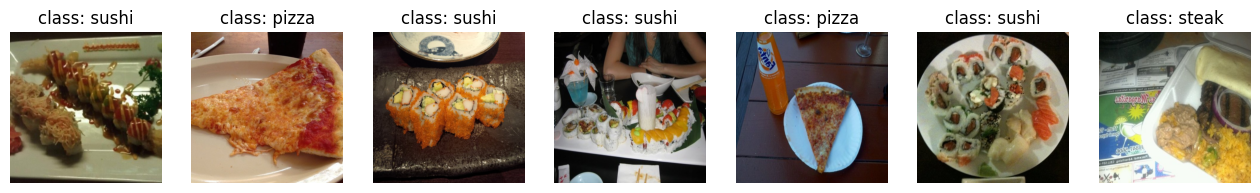

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=25,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 7, setting to 7 and removing shape display.


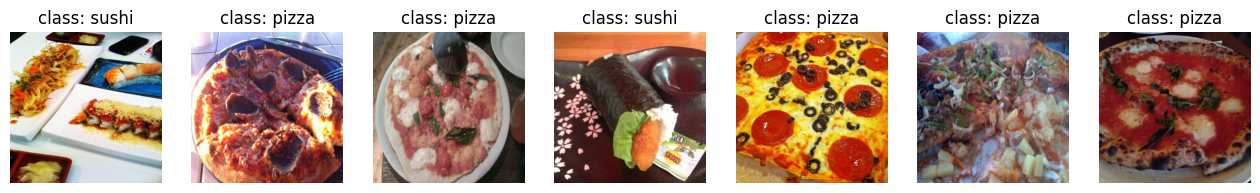

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=35,
                      classes=class_names,
                      seed=42)

For display purposes, n shouldn't be larger than 7, setting to 7 and removing shape display.


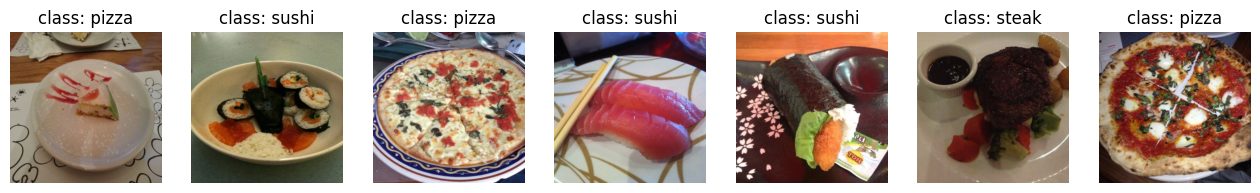

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=100,
                      classes=class_names,
                      seed=None)

Using the train_data_custom

For display purposes, n shouldn't be larger than 7, setting to 7 and removing shape display.


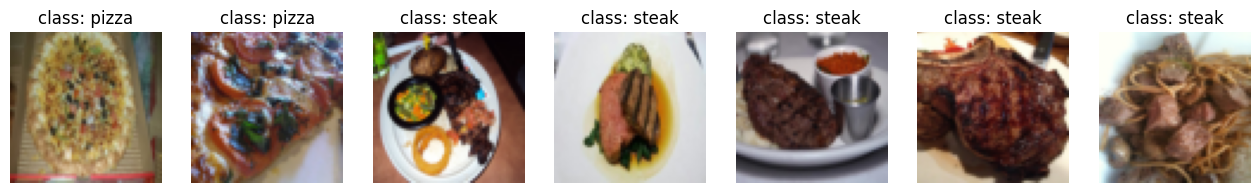

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom,
                      n=25,
                      classes=class_names,
                      seed=None)

# **<font color =red> 5.4 Turn custom loaded images into DataLoader's**

Turning the custom data into Dataset with (features mapped to labels or X's mapped to y's) through our ImageFolderCustom class.

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 64
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=BATCH_SIZE, # how many samples per batch?
                                     num_workers= NUM_WORKERS, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=BATCH_SIZE,
                                    num_workers= NUM_WORKERS,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x798082143f40>,
 <torch.utils.data.dataloader.DataLoader at 0x798082143f70>)

In [ ]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([64, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


# **<font color = red> 6. Other forms of transforms (data augmentation)**
Data augmentation is the process of altering your data in such a way that you artificially increase the diversity of your training set.

In [ ]:
# transforms.TrivialAugmentWide() into transforms.Compose()
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

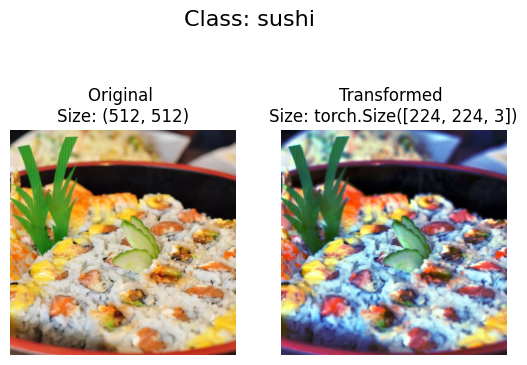

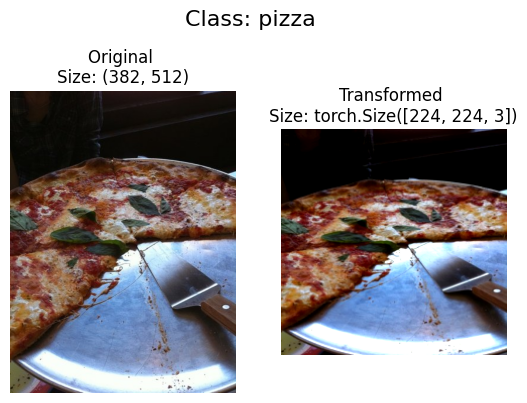

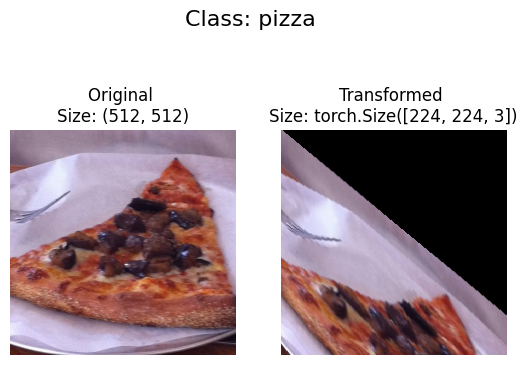

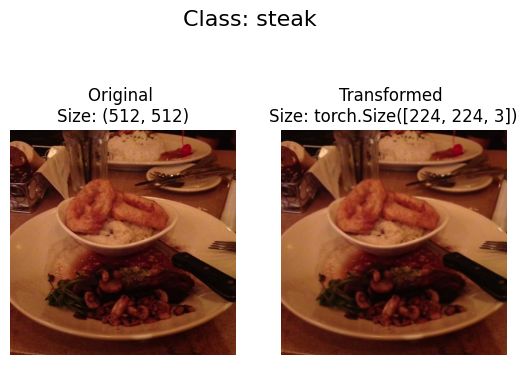

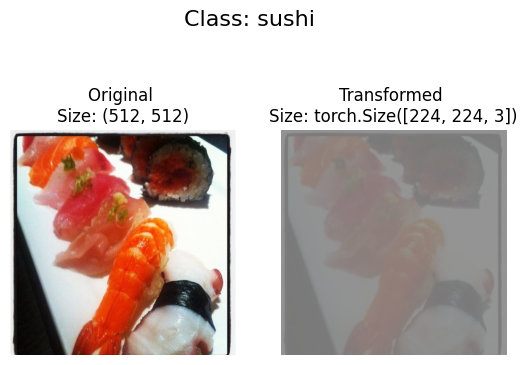

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=5,
    seed=None
)

# **<font color = red> 7. Model ABD1: TinyVGG without data augmentation**

Constructing a computer vision model to see if we can classify an image of pizza, steak or sushi.

https://arxiv.org/abs/2004.15004

# **<font color =red> 7.1 Creating transforms and loading data for Model _ABD1**

1.Load the data, turning each of the training and test folders first into a Dataset with torchvision.datasets.ImageFolder()

2.Then into a DataLoader using torch.utils.data.DataLoader()

In [ ]:
#  resizing the images to (64, 64) and turning them into tensors.

# Creating a simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7980820c5bd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7980820c7be0>)

# **<font color =red> 7.2 Creating TinyVGG model class**


In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2 # default stride value is same as kernel_size
            )
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )

        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,
                      hidden_units,
                      kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*4,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)

        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.classifier(x) # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_ABD1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=100,
                  output_shape=len(train_data.classes)).to(device)
model_ABD1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Li

# **<font color = red> 7.3 Try a forward pass on a single image (to test the model)**

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_ABD1.eval()
with torch.inference_mode():
    pred = model_ABD1(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}") # Here  when you run the model many times, most of the predictions will be wrong

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0205,  0.0048,  0.0067]])

Output prediction probabilities:
tensor([[0.3275, 0.3359, 0.3366]])

Output prediction label:
tensor([2])

Actual label:
1


# **<font color =red> 7.4 Use torchinfo to get an idea of the shapes going through our model**

In [ ]:
# Install torchinfo if it's not available, import it if it is

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary

summary(model_ABD1, input_size = [1,3,64,64]) # doing a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 100, 32, 32]          --
│    └─Conv2d: 2-1                       [1, 100, 64, 64]          2,800
│    └─ReLU: 2-2                         [1, 100, 64, 64]          --
│    └─Conv2d: 2-3                       [1, 100, 64, 64]          90,100
│    └─ReLU: 2-4                         [1, 100, 64, 64]          --
│    └─MaxPool2d: 2-5                    [1, 100, 32, 32]          --
├─Sequential: 1-2                        [1, 100, 16, 16]          --
│    └─Conv2d: 2-6                       [1, 100, 32, 32]          90,100
│    └─ReLU: 2-7                         [1, 100, 32, 32]          --
│    └─Conv2d: 2-8                       [1, 100, 32, 32]          90,100
│    └─ReLU: 2-9                         [1, 100, 32, 32]          --
│    └─MaxPool2d: 2-10                   [1, 100, 16, 16]          --


# **<font color =red> 7.5 Create train & test loop functions**

1. train_step() - takes in a model, a DataLoader, a loss function and an optimizer and trains the model on the DataLoader.

2. test_step() - takes in a model, a DataLoader and a loss function and evaluates the model on the DataLoader.

3. train() - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

# **<font color =red>7.6 Creating a train() function to combine train_step() and test_step()**

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5
          ):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           #device = device
                                           )
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                           loss_fn=loss_fn
                                        )

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

# **<font color=red> 7.7 Train and Evaluate Model_ABD1**

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_ABD1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=60,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_ABD1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_ABD1
model_ABD1_results = train(model=model_ABD1,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1072 | train_acc: 0.2773 | test_loss: 1.0954 | test_acc: 0.4830
Epoch: 2 | train_loss: 1.0845 | train_acc: 0.4375 | test_loss: 1.1312 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.0967 | train_acc: 0.3086 | test_loss: 1.0969 | test_acc: 0.3220
Epoch: 4 | train_loss: 0.9789 | train_acc: 0.5156 | test_loss: 0.9694 | test_acc: 0.4735
Epoch: 5 | train_loss: 0.9932 | train_acc: 0.4727 | test_loss: 1.1970 | test_acc: 0.4744
Epoch: 6 | train_loss: 0.9547 | train_acc: 0.6680 | test_loss: 1.1188 | test_acc: 0.3532
Epoch: 7 | train_loss: 0.9622 | train_acc: 0.6055 | test_loss: 1.0336 | test_acc: 0.4650
Epoch: 8 | train_loss: 0.8152 | train_acc: 0.6758 | test_loss: 1.1538 | test_acc: 0.4034
Epoch: 9 | train_loss: 0.9173 | train_acc: 0.5234 | test_loss: 1.2137 | test_acc: 0.4441
Epoch: 10 | train_loss: 0.8678 | train_acc: 0.6719 | test_loss: 0.9317 | test_acc: 0.5265
Epoch: 11 | train_loss: 0.8323 | train_acc: 0.6602 | test_loss: 1.0469 | test_acc: 0.4754
Epoch: 12 | train_l

# **<font color = red> 7.8 Plot the loss curves of Model ABD1**

In [ ]:
# Check the model_ABD1_results keys
model_ABD1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

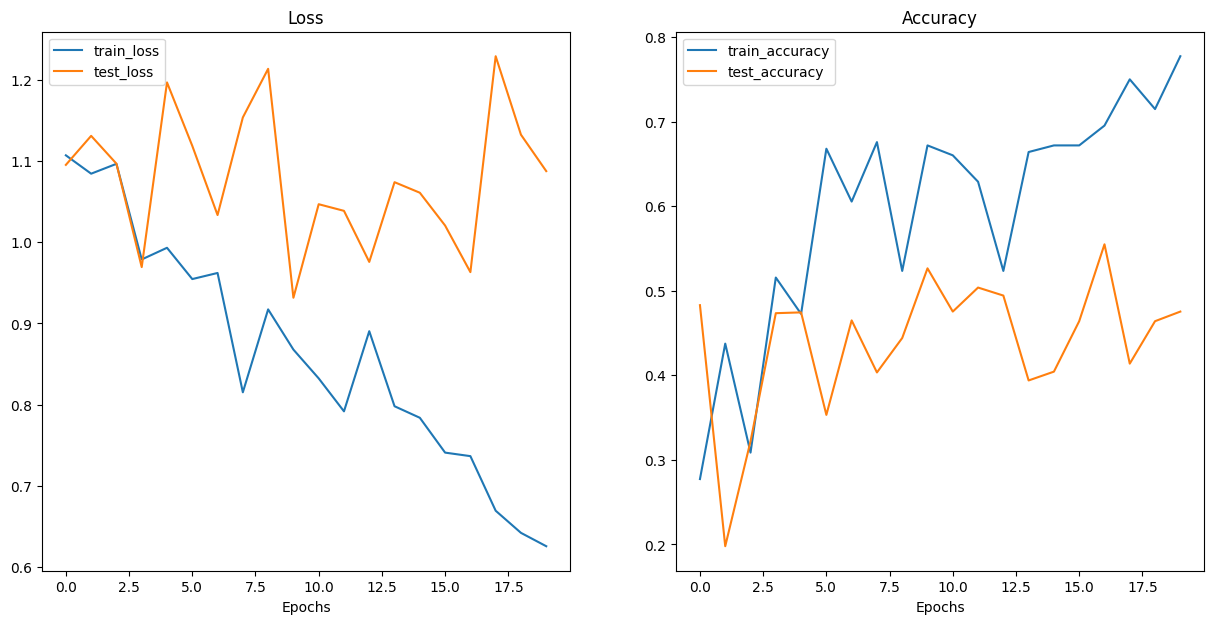

In [ ]:
plot_loss_curves(model_ABD1_results)

# **<font color =red> 8. What should an ideal loss curve look like**

---



---



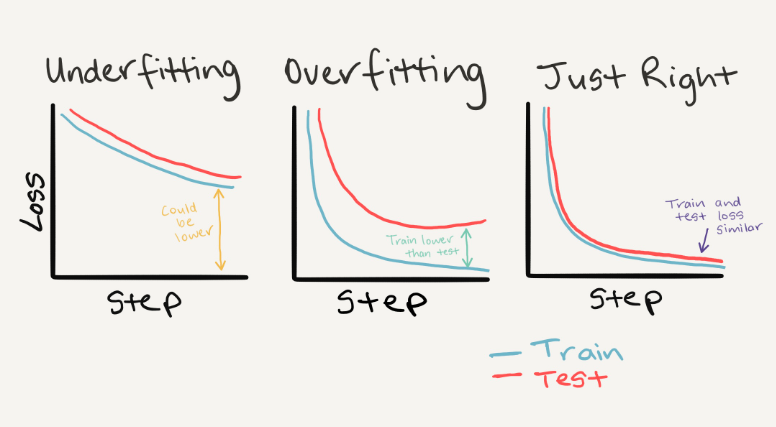

# **8.1 How to deal with overfitting**

Since the main problem with overfitting is that you're model is fitting the training data too well, you'll want to use techniques to "reign it in".

A common technique of preventing overfitting is known as regularization.

I like to think of this as "making our models more regular", as in, capable of fitting more kinds of data.

Let's discuss a few methods to prevent overfitting.

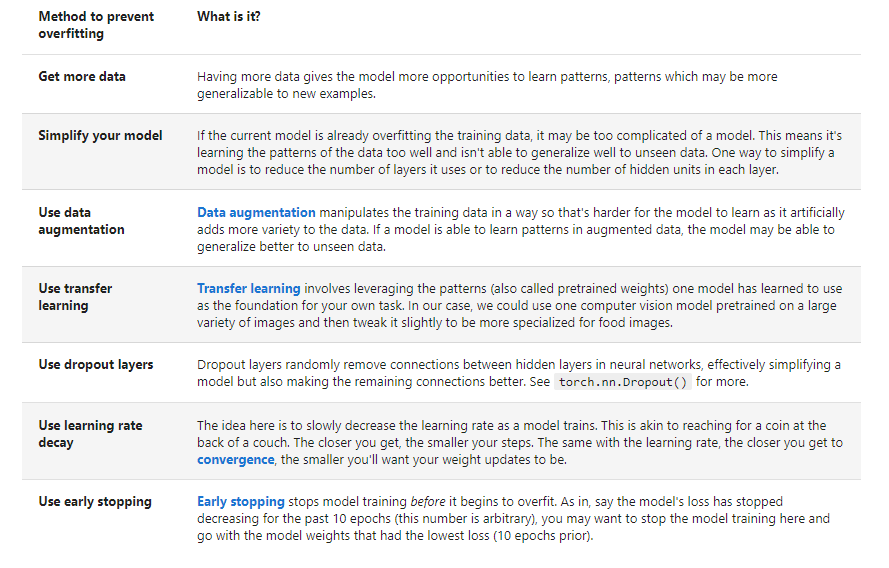


# **8.2 How to deal with underfitting**

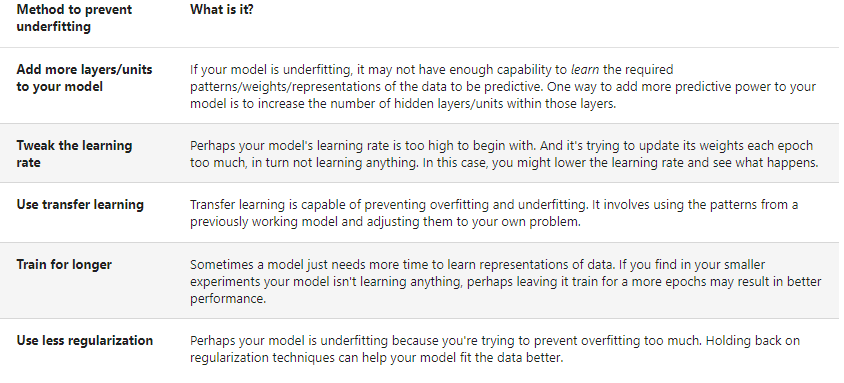

# **<font color = red> 8.3 The balance between overfitting and underfitting**

---



# <font color = red> 9. Model 1: TinyVGG with Data Augmentation

# 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
                 transforms.Resize(size=(64,64)),
                 transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                 transforms.ToTensor()
                                                         ])
#create testing transform
test_transform_simple = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
                                      ])

# <font color = red> 9.2 Create train and test Dataset's and DataLoader's

---



This will make sure the train Dataset uses the train_transform_trivial_augment and the test Dataset uses the test_transform.

In [ ]:
train_data_augmented = datasets.ImageFolder(root =train_dir,
                                           transform = train_transform_trivial)
test_data_simple =  datasets.ImageFolder(root=test_dir,
                                            transform = test_transform_simple)


train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [ ]:
# Turn Datasets into DataLoader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                      batch_size = BATCH_SIZE,
                                      shuffle = True,
                                      num_workers= NUM_WORKERS

                                      )

test_dataloader_simple  = DataLoader(dataset=test_data_simple,
                                      batch_size= BATCH_SIZE,
                                     shuffle = False,
                                      num_workers= NUM_WORKERS,

                                     )

train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x79807884afe0>,
 <torch.utils.data.dataloader.DataLoader at 0x798082143040>)

##  <font color = **red**>9.3 Constraucting and train model A0

In [ ]:
# Create model_1 and send it to the target device

torch.manual_seed(42)
model_A0 = TinyVGG(
    input_shape= 3,
    hidden_units = 10,
    output_shape= len(train_data_augmented.classes)).to(device)

model_A0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_A0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_A0
model_A0_results = train(model=model_A0,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1016 | train_acc: 0.2500 | test_loss: 1.0982 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0919 | train_acc: 0.4258 | test_loss: 1.1059 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0849 | train_acc: 0.4258 | test_loss: 1.1238 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1122 | train_acc: 0.3047 | test_loss: 1.1386 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0857 | train_acc: 0.4258 | test_loss: 1.1444 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.1031 | train_acc: 0.3047 | test_loss: 1.1482 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0976 | train_acc: 0.3047 | test_loss: 1.1465 | test_acc: 0.2604
Epoch: 8 | train_loss: 1.0946 | train_acc: 0.2695 | test_loss: 1.1470 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1199 | train_acc: 0.2930 | test_loss: 1.1464 | test_acc: 0.2188
Epoch: 10 | train_loss: 1.0941 | train_acc: 0.4102 | test_loss: 1.1239 | test_acc: 0.2604
Epoch: 11 | train_loss: 1.0913 | train_acc: 0.4258 | test_loss: 1.1200 | test_acc: 0.2604
Epoch: 12 | train_l

#<font color = red> 9.4 Plot the loss curves of Model A0

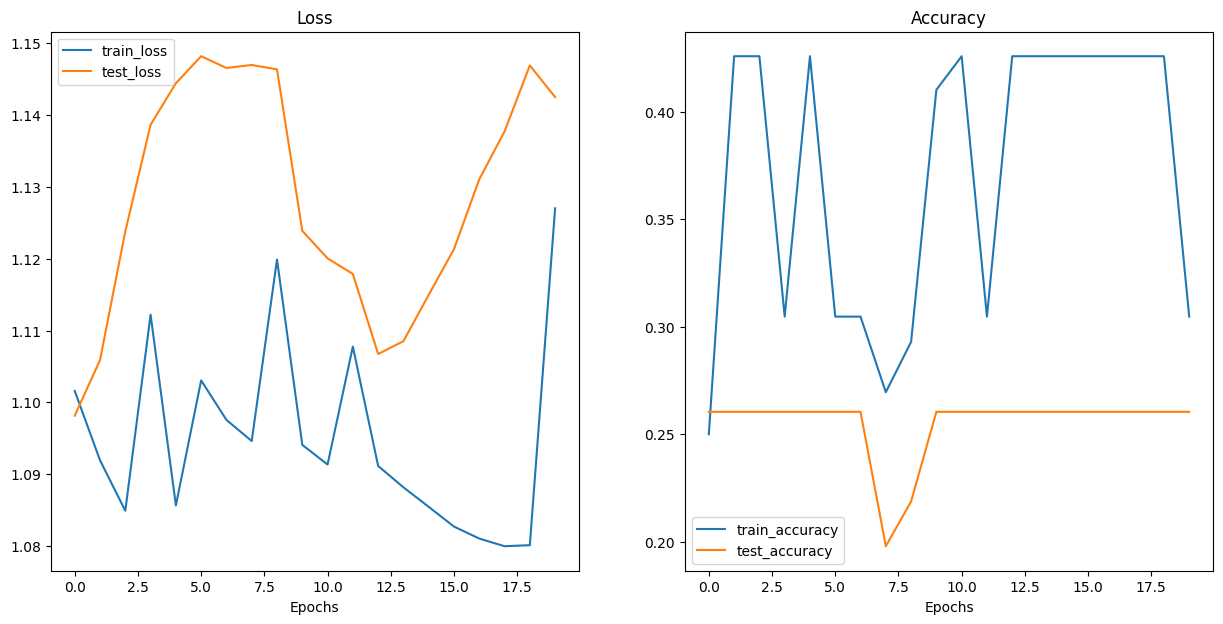

In [ ]:
plot_loss_curves(model_A0_results)

model is not doing very well!

# **<font color = red> 10 Comparing the model results**

In [ ]:
import pandas as pd
model_A0_df = pd.DataFrame(model_A0_results)
model_ABD1_df = pd.DataFrame(model_ABD1_results)
model_A0_df

train_loss  train_acc  test_loss  test_acc
0     1.101590   0.250000   1.098150  0.260417
1     1.091936   0.425781   1.105885  0.260417
2     1.084912   0.425781   1.123805  0.260417
3     1.112204   0.304688   1.138638  0.260417
4     1.085657   0.425781   1.144417  0.260417
5     1.103057   0.304688   1.148179  0.260417
6     1.097559   0.304688   1.146545  0.260417
7     1.094620   0.269531   1.146961  0.197917
8     1.119882   0.292969   1.146354  0.218750
9     1.094087   0.410156   1.123873  0.260417
10    1.091349   0.425781   1.120047  0.260417
11    1.107766   0.304688   1.117869  0.260417
12    1.091153   0.425781   1.106733  0.260417
13    1.088177   0.425781   1.108519  0.260417
14    1.085461   0.425781   1.114964  0.260417
15    1.082711   0.425781   1.121334  0.260417
16    1.081047   0.425781   1.131046  0.260417
17    1.079979   0.425781   1.137709  0.260417
18    1.080124   0.425781   1.146896  0.260417
19    1.127010   0.304688   1.142488  0.260417

<font color = red>

# <font color = red> Visualising the model_A0 and Model_ABD1

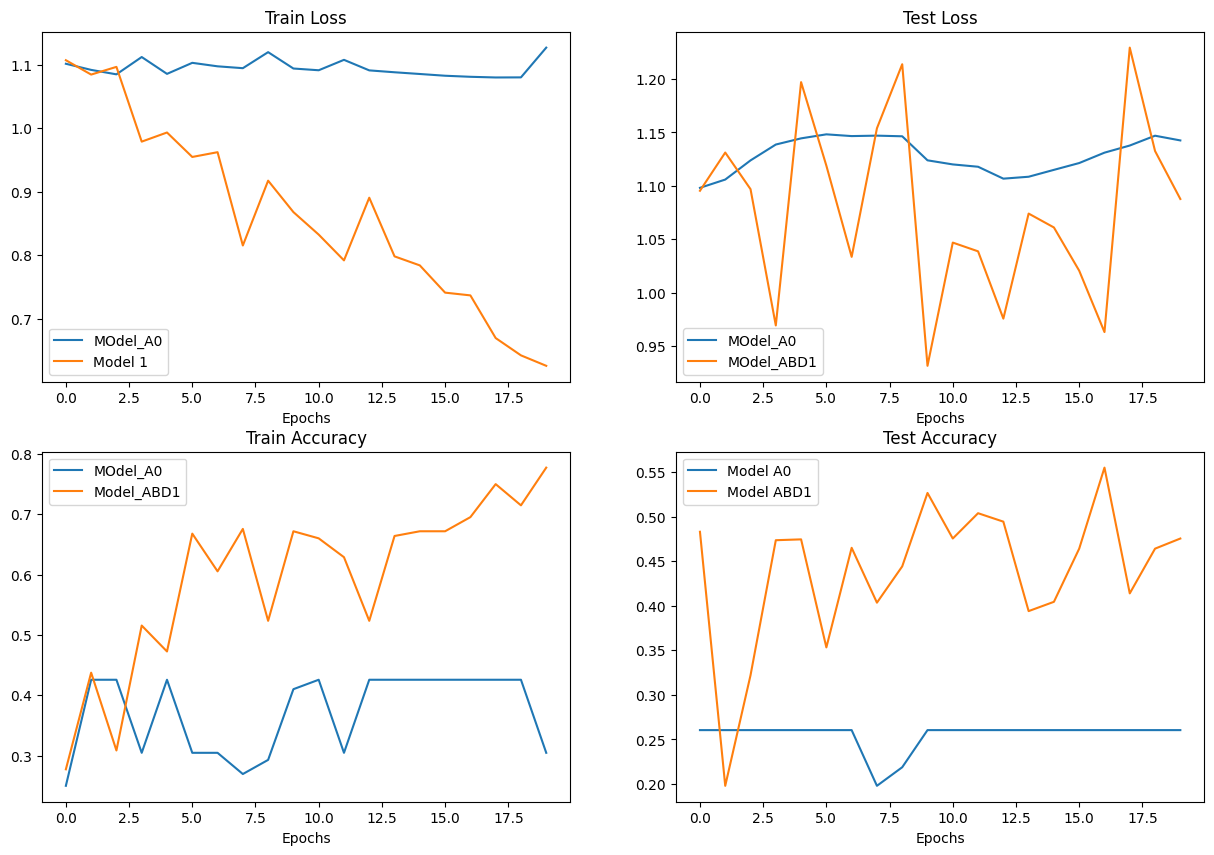

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_A0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_A0_df["train_loss"], label="MOdel_A0")
plt.plot(epochs, model_ABD1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_A0_df["test_loss"], label="MOdel_A0")
plt.plot(epochs, model_ABD1_df["test_loss"], label="MOdel_ABD1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_A0_df["train_acc"], label="MOdel_A0")
plt.plot(epochs, model_ABD1_df["train_acc"], label="Model_ABD1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_A0_df["test_acc"], label="Model A0")
plt.plot(epochs, model_ABD1_df["test_acc"], label="Model ABD1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();


# **<font color = red>  11. Make a prediction on a custom image**

In [ ]:
# Download custom image using python request modeule
import requests

# Setup custom image path
#custom_image_path = data_path / "04-pizza-dad.jpeg"
custom_image_path = data_path / "/content/03-baba.jpg"
# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

/content/03-baba.jpg already exists, skipping download.


# <font color = red> 11.1 Loading in a custom image with PyTorch

PyTorch's torchvision has several input and output ("IO" or "io" for short) methods for reading and writing images and video in torchvision.io.

Since we want to load in an image, we'll use torchvision.io.read_image().

This method will read a JPEG or PNG image and turn it into a 3 dimensional RGB or grayscale torch.Tensor with values of datatype uint8 in range [0, 255].

In [ ]:
import torchvision
# read in the custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# printing out the image data
print(f'Custom image tensor :\n{custom_image_uint8}\n')
print(f'Custome image shape:\n{custom_image_uint8.shape}\n')
print(f'custom image dtype:\n{custom_image_uint8.dtype}')


Custom image tensor :
tensor([[[246, 251, 254,  ..., 249, 254, 253],
         [254, 250, 242,  ..., 255, 247, 254],
         [248, 254, 249,  ..., 252, 255, 255],
         ...,
         [248, 245, 243,  ..., 178, 224, 211],
         [244, 245, 245,  ..., 230, 213, 208],
         [244, 245, 245,  ..., 206, 207, 212]],

        [[247, 252, 255,  ..., 247, 252, 251],
         [255, 251, 243,  ..., 254, 245, 252],
         [249, 255, 250,  ..., 250, 254, 254],
         ...,
         [247, 244, 242,  ..., 177, 223, 210],
         [245, 246, 246,  ..., 231, 214, 207],
         [245, 246, 246,  ..., 207, 208, 211]],

        [[249, 254, 255,  ..., 248, 253, 252],
         [255, 253, 245,  ..., 255, 246, 253],
         [251, 255, 252,  ..., 251, 255, 255],
         ...,
         [252, 249, 247,  ..., 173, 219, 206],
         [250, 251, 251,  ..., 226, 209, 203],
         [250, 251, 251,  ..., 202, 203, 207]]], dtype=torch.uint8)

Custome image shape:
torch.Size([3, 434, 305])

custom image dty

In [ ]:
# Try to make a prediction on image in uint8 format (this will error)
model_ABD1.eval()
with torch.inference_mode():
    model_ABD1(custom_image_uint8.to(device))

RuntimeError: ignored

# Converting the custom image to the same datatypes the same as what our model was trained on

In [ ]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.9647, 0.9843, 0.9961,  ..., 0.9765, 0.9961, 0.9922],
         [0.9961, 0.9804, 0.9490,  ..., 1.0000, 0.9686, 0.9961],
         [0.9725, 0.9961, 0.9765,  ..., 0.9882, 1.0000, 1.0000],
         ...,
         [0.9725, 0.9608, 0.9529,  ..., 0.6980, 0.8784, 0.8275],
         [0.9569, 0.9608, 0.9608,  ..., 0.9020, 0.8353, 0.8157],
         [0.9569, 0.9608, 0.9608,  ..., 0.8078, 0.8118, 0.8314]],

        [[0.9686, 0.9882, 1.0000,  ..., 0.9686, 0.9882, 0.9843],
         [1.0000, 0.9843, 0.9529,  ..., 0.9961, 0.9608, 0.9882],
         [0.9765, 1.0000, 0.9804,  ..., 0.9804, 0.9961, 0.9961],
         ...,
         [0.9686, 0.9569, 0.9490,  ..., 0.6941, 0.8745, 0.8235],
         [0.9608, 0.9647, 0.9647,  ..., 0.9059, 0.8392, 0.8118],
         [0.9608, 0.9647, 0.9647,  ..., 0.8118, 0.8157, 0.8275]],

        [[0.9765, 0.9961, 1.0000,  ..., 0.9725, 0.9922, 0.9882],
         [1.0000, 0.9922, 0.9608,  ..., 1.0000, 0.9647, 0.9922],
         [0.9843, 1.0000, 0.9882,  ..

# <font color = red> 11.2 Predicting on custom images with a trained PyTorch model

# ploting the image with matplotlib to make sure it looks okay, remember we'll have to permute the dimensions from CHW to HWC to suit matplotlib's requirements.

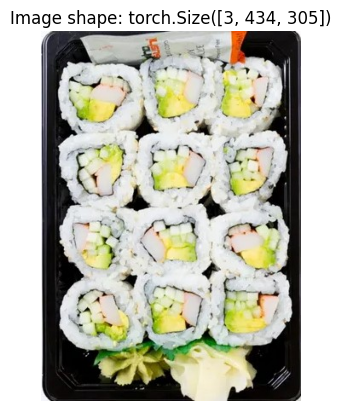

In [ ]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

# Composing a transform to resize the image using torchvision.transform.Resize()

In [ ]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 434, 305])
New shape: torch.Size([3, 64, 64])


In [ ]:
model_ABD1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_ABD1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [ ]:
custom_image_pred

tensor([[ 2.1742, -3.6393, -0.5895]])

# Let's convert them from logits -> prediction probabilities -> prediction labels.

In [ ]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 2.1742, -3.6393, -0.5895]])
Prediction probabilities: tensor([[0.9380, 0.0028, 0.0592]])
Prediction label: tensor([0])


# We can convert it to a string class name prediction by indexing on the class_names list.

In [ ]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'

In [ ]:
custom_image_pred_probs

tensor([[0.9380, 0.0028, 0.0592]])

# <font color = red> 11.3 Putting custom image prediction together: building a function

=Putting all the step together to form a reusable function=

---



1. Takes in a target image path and converts to the right datatype for our model (torch.float32).
2. Makes sure the target image pixel values are in the range [0, 1].
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} || Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} || Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

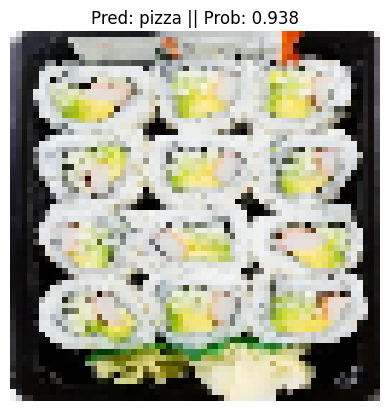

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_ABD1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

# Predicting with model_A0

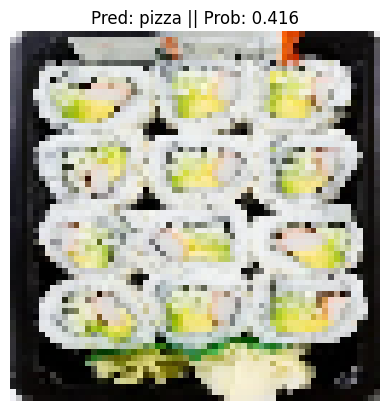

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_A0,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)